In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
160,161,1,4,8,8,0,0,0,3459,No,100.000000,0.000000,0.0,Selective
161,162,2,4,6,6,0,0,0,3000,No,100.000000,0.000000,0.0,Selective
162,163,2,4,6,6,0,0,0,10888,No,100.000000,0.000000,0.0,Selective
163,164,2,4,6,6,0,0,0,7081,No,100.000000,0.000000,0.0,Selective
164,165,2,4,7,6,0,1,0,9953,No,85.714286,14.285714,0.0,Selective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,1,7,8,8,0,0,0,12332,No,100.000000,0.000000,0.0,Selective
320,321,1,7,6,0,3,6,0,8190,No,0.000000,100.000000,50.0,Selective
321,322,1,7,7,5,0,2,0,6749,No,71.428571,28.571429,0.0,Selective
322,323,1,7,7,7,0,0,0,7795,No,100.000000,0.000000,0.0,Selective


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [8, 10, 11, 12]].values  
display(x)

array([[3.45900000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.08880000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [7.08100000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [9.95300000e+03, 8.57142857e+01, 1.42857143e+01, 0.00000000e+00],
       [1.42070000e+04, 1.00000000e+02, 0.00000000e+00, 2.22222222e+01],
       [1.40360000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.26460000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [7.25100000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.00260000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.14820000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.20860000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.08160000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [6.34500000e+03, 1.00000000e+02, 0.00000000e

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[-1.42198814e+00,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-1.49278251e+00,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-2.76168192e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-8.63345004e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-4.20378940e-01, -4.17936084e-01,  4.17936084e-01,
        -3.16765400e-01],
       [ 2.35741406e-01,  3.68015386e-01, -3.68015386e-01,
         1.42682072e+00],
       [ 2.09367034e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-5.02113725e-03,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-8.37124867e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-4.09119705e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-1.84551951e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-9.13933502e-02,  3.68015386e-01, -3.68015386e-01,
      

In [5]:
x = dataset.iloc[:, [2, 8, 10, 11, 12]].copy()
x[['total_duration', 'percentage_no_of_correct_responses', 'oer', 'cer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 4.00000000e+00, -1.42198814e+00,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -1.49278251e+00,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -2.76168192e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -8.63345004e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -4.20378940e-01, -4.17936084e-01,
         4.17936084e-01, -3.16765400e-01],
       [ 4.00000000e+00,  2.35741406e-01,  3.68015386e-01,
        -3.68015386e-01,  1.42682072e+00],
       [ 4.00000000e+00,  2.09367034e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -5.02113725e-03,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -8.37124867e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -4.09119705e-01,  3.68015386e-01,
        -3.68015386e-01

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import OPTICS

# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(x)
# retrieve unique clusters
clusters = unique(yhat)

In [7]:
new_df = dataset.iloc[:, [2, 8, 10, 11, 12]].copy()
new_df['clusters'] = yhat
new_df.head()
display(new_df)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
160,4,3459,100.000000,0.000000,0.0,0
161,4,3000,100.000000,0.000000,0.0,0
162,4,10888,100.000000,0.000000,0.0,0
163,4,7081,100.000000,0.000000,0.0,0
164,4,9953,85.714286,14.285714,0.0,-1
...,...,...,...,...,...,...
319,7,12332,100.000000,0.000000,0.0,3
320,7,8190,0.000000,100.000000,50.0,-1
321,7,6749,71.428571,28.571429,0.0,-1
322,7,7795,100.000000,0.000000,0.0,3


In [8]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

print("Silhouette Coefficient: %0.3f" % silhouette_score(x, yhat))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, yhat))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, yhat))

Silhouette Coefficient: 0.272
Calinski-Harabasz Index: 19.203
Davies-Bouldin Index: 1.395


# Cluster Analysis

## Cluster 1

In [9]:
len(new_df[new_df["clusters"] == 0])

34

In [10]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
# cluster_0.boxplot(column =['CER'], grid = False)
# cluster_0.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
160,4,3459,100.0,0.0,0.0,0
161,4,3000,100.0,0.0,0.0,0
162,4,10888,100.0,0.0,0.0,0
163,4,7081,100.0,0.0,0.0,0
166,4,14036,100.0,0.0,0.0,0
167,4,12646,100.0,0.0,0.0,0
168,4,7251,100.0,0.0,0.0,0
169,4,10026,100.0,0.0,0.0,0
170,4,11482,100.0,0.0,0.0,0
171,4,12086,100.0,0.0,0.0,0


In [11]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['total_duration'].max()
minVal = cluster_0['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_0['cer'].max()
minVal = cluster_0['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  3000
total_duration max -  16222

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0

cer min -  0.0
cer max -  0.0


## Cluster 2

In [12]:
len(new_df[new_df["clusters"] == 1])

36

In [13]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
#cluster_1.boxplot(column =['CER'], grid = False)
#cluster_1.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
218,5,11978,100.0,0.0,0.0,1
219,5,10358,100.0,0.0,0.0,1
220,5,11941,100.0,0.0,0.0,1
221,5,13415,100.0,0.0,0.0,1
222,5,9074,100.0,0.0,0.0,1
223,5,8005,100.0,0.0,0.0,1
224,5,15879,100.0,0.0,0.0,1
225,5,12677,100.0,0.0,0.0,1
226,5,7744,100.0,0.0,0.0,1
227,5,10849,100.0,0.0,0.0,1


In [14]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['total_duration'].max()
minVal = cluster_1['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_1['cer'].max()
minVal = cluster_1['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  5437
total_duration max -  16502

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0

cer min -  0.0
cer max -  0.0


## Cluster 3

In [15]:
len(new_df[new_df["clusters"] == 2])

18

In [16]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
274,6,10688,100.0,0.0,0.0,2
275,6,14634,100.0,0.0,0.0,2
277,6,12183,100.0,0.0,0.0,2
278,6,15429,100.0,0.0,0.0,2
279,6,9037,100.0,0.0,0.0,2
280,6,14263,100.0,0.0,0.0,2
281,6,13692,100.0,0.0,0.0,2
282,6,11133,100.0,0.0,0.0,2
283,6,11645,100.0,0.0,0.0,2
284,6,9792,100.0,0.0,0.0,2


In [17]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['total_duration'].max()
minVal = cluster_2['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_2['percentage_no_of_correct_responses'].max()
minVal = cluster_2['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_2['oer'].max()
minVal = cluster_2['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_2['cer'].max()
minVal = cluster_2['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  8970
total_duration max -  20177

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0

cer min -  0.0
cer max -  0.0


## Cluster 3

In [18]:
len(new_df[new_df["clusters"] == 3])

21

In [19]:
cluster_3 = new_df[new_df["clusters"] == 3 ]
display(cluster_3)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
296,7,16169,100.0,0.0,0.0,3
297,7,9126,100.0,0.0,0.0,3
298,7,14426,100.0,0.0,0.0,3
299,7,10181,100.0,0.0,0.0,3
301,7,14593,100.0,0.0,0.0,3
302,7,7152,100.0,0.0,0.0,3
304,7,11526,100.0,0.0,0.0,3
305,7,9090,100.0,0.0,0.0,3
306,7,8325,100.0,0.0,0.0,3
307,7,11324,100.0,0.0,0.0,3


In [20]:
cluster_3 = new_df[new_df["clusters"] == 3 ]

maxVal = cluster_3['total_duration'].max()
minVal = cluster_3['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_3['percentage_no_of_correct_responses'].max()
minVal = cluster_3['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_3['oer'].max()
minVal = cluster_3['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_3['cer'].max()
minVal = cluster_3['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  5568
total_duration max -  16169

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0

cer min -  0.0
cer max -  0.0


In [21]:
len(new_df[new_df["clusters"] == -1])

55

In [22]:
outliers = new_df[new_df["clusters"] == -1 ]
display(outliers)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
164,4,9953,85.714286,14.285714,0.000000,-1
165,4,14207,100.000000,0.000000,22.222222,-1
175,4,10236,87.500000,12.500000,0.000000,-1
177,4,10348,12.500000,87.500000,0.000000,-1
180,4,13987,75.000000,25.000000,0.000000,-1
181,4,15440,85.714286,14.285714,0.000000,-1
182,4,22296,100.000000,0.000000,33.333333,-1
183,4,11724,33.333333,66.666667,0.000000,-1
185,4,11101,85.714286,14.285714,0.000000,-1
186,4,11191,83.333333,16.666667,0.000000,-1


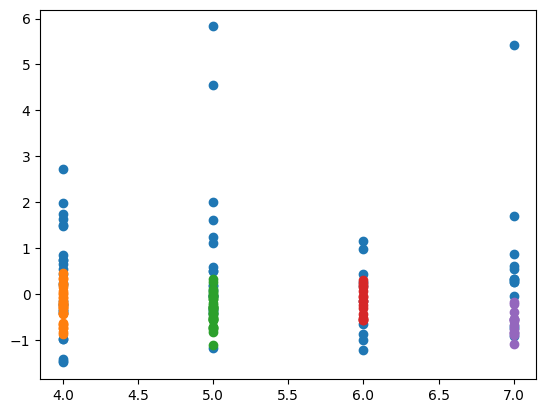

In [23]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(x)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()